## 1. 초기 작업

### 1.1 필요한 패키지 불러오기

In [183]:
!pip install seaborn


  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)


In [184]:
import pandas as pd
import sklearn as skl
import seaborn as sns
import numpy as np
from openpyxl import load_workbook 
import copy
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime
from matplotlib import rc

In [68]:
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False


### 1.2 필요한 정보들 목록

1. 식수 정보 (2022)
2. 식수 정보 (2023)
3. 메뉴 정보 (2022)
4. 메뉴 정보 (2023)
5. 버스 승하차 기록
6. 지하철 승하차 기록
7. 날씨 기록
8. 교내 이벤트

### 1.3 각각의 값 불러오기

#### 1.3.1 2022년 1월 값 추출하기

In [69]:
# 마 이제 함 불러와 봐라!

filename = '/Users/hanyoungwook/2023-1/capstone_design/needed_data/식수현황/식수인원현황 2022.xlsx'

## 파일 불러옴 
demend_info_2022 = load_workbook(filename,data_only = True)

#원하는 시트 불러옴
demend_info_2022_01 = demend_info_2022['2022.01']

#판다스 프레임으로 변환
demend_info_2022_01 = pd.DataFrame(demend_info_2022_01.values)

#날짜 추출
date = demend_info_2022_01.loc[4:68, 0]
date = date.iloc[::2]

#원하는 값(필요한 값 추출)
demend_info_2022_01 = demend_info_2022_01.loc[4:68, 12:19]
# 짝수줄
temp = demend_info_2022_01.iloc[::2, :]
#홀수줄
temp2 = demend_info_2022_01.iloc[1::2]

#날짜 더 해줌
temp = pd.concat([date, temp], axis=1)

##1월만의 전처리
temp.drop(temp.tail(1).index, inplace=True)
temp = temp.reset_index()

#temp = pd.merge(temp,temp2, )
temp2 = pd.DataFrame(temp2[[13,16,18,19]])
temp2 = temp2.reset_index()

#원하는 모양으로 합치기
temp = pd.concat([temp,temp2], axis=1)


#필요없는 값 빼버리기
temp = temp.drop(['index',14],axis=1)

# 여기서 앞에 있는 18,19를 빼야 한다.
# 어케 빼지~~ 일단 라벨링을 하면 좋을듯
temp.columns = ['날짜','조식','중식1','중식2','석식','예약','공란','공란','중식수','석식수','합계','매출']
temp.drop(temp.tail(1).index, inplace=True)
temp = temp.drop(['공란'],axis=1)
demend_info_2022_01 = copy.deepcopy(temp)
# 이걸 이대로 불러오면 원하는 모양이 안 나온다.  
# 데이터 자르기 열 기준으로 12 ~ 19 가져오면 될듯 이게 도담 식당 데이터니까.
# 12는 조식가격 13은 중식 1 가격 /14는 중식2가격 /15는 석식가격 /16은 
# 뭐가 필요할까아아ㅏ 일단 그렇게 해보자. 또 자를 정보가 있나? 행 기준 4 ~ 68 일듯 근데 값을 그냥 치환 시켜 버려야 할듯
# 근데 찾아보니.. 월 마다 정리 방식이 꽤나 다르네요 깔깔
# 월마다 데이터를 알아서 조립해야한다니 정말 서운하네요.
# 자 이제 잘라보자 
# 자르기 성공 
# 근데 그리고 이제 값을 수정해서 따로 넣어야 하는데 어떻게 하면 좋을까. 
# 원하는 대로 슬라이싱을 해볼까.
# 날짜, 조식가격,중식1가격, 중식2가격, 석식가격


#### 일단 2022년 1월

In [70]:
demend_info_2022_01

,날짜,조식,중식1,중식2,석식,예약,중식수,석식수,합계,매출
0,2022-01-01 00:00:00,3500,5000,5000,5000,8000,None,None,0,0
1,2022-01-02 00:00:00,5000,6000,5000,5000,5000,None,None,0,0
2,2022-01-03 00:00:00,3000,5000,5000,5000,None,359,92,451,2255000
3,2022-01-04 00:00:00,3000,5000,5000,5000,4500,420,87,507,2535000
4,2022-01-05 00:00:00,3000,5000,5000,5000,9000,378,70,448,2240000
5,2022-01-06 00:00:00,3500,5000,5000,5000,5000,418,81,499,2495000
6,2022-01-07 00:00:00,3500,5000,5000,5000,5000,275,79,354,1770000
7,2022-01-08 00:00:00,3500,5000,5000,5000,None,None,None,0,0
8,2022-01-09 00:00:00,3500,6000,5000,5000,5000,None,None,0,0
9,2022-01-10 00:00:00,3500,5000,5000,5000,13000,408,83,491,2455000


#### 1.3.2 2022년 2월 값 추출하기

In [71]:
# 2월 시트 불러오기
demend_info_2022_02 = demend_info_2022['2022.02']

# 판다스 프레임으로 변환
demend_info_2022_02 = pd.DataFrame(demend_info_2022_02.values)


# 날짜 추출하기
date = demend_info_2022_02.loc[4:59, 0]
date = pd.DataFrame(date)
date = date.iloc[::2]

# 원하는 값 추출하기

#원하는 값(필요한 값 추출)
demend_info_2022_02 = demend_info_2022_02.loc[4:59, 12:19]
# 짝수줄
temp = demend_info_2022_02.iloc[::2, :]

# 날짜 더해 줌

temp = pd.concat([date, temp], axis=1)
#홀수줄
temp2 = demend_info_2022_02.iloc[1::2]

## 각각에 대해서 인덱스를 새로 추가해주고, 합치고 , 필요 없는것 들 잘라준다

temp = temp.reset_index()
temp2 = temp2.reset_index()

temp = pd.concat([temp,temp2], axis=1)
temp = temp.drop(['index',14],axis=1)
temp.columns = ['날짜','조식','중식1','중식2','석식','예약','공란','공란','공란','중식수','공란','석식수','공란','합계','매출']
temp.loc[3, '석식수'] = temp.loc[3, '석식수'] +6 #예약(공란)에 들어있던 값을 석식을 추가해줌
temp = temp.drop(['공란'],axis=1)

demend_info_2022_02 = copy.deepcopy(temp)

#### 2022년 2월의 값

In [72]:
demend_info_2022_02

,날짜,조식,중식1,중식2,석식,예약,중식수,석식수,합계,매출
0,2022-02-01 00:00:00,3500,5000,5000,5000,15000,None,None,0,0
1,2022-02-02 00:00:00,5000,5000,5000,5000,5000,None,None,0,0
2,2022-02-03 00:00:00,3000,5000,5000,5000,None,265,82,347,1735000
3,2022-02-04 00:00:00,3000,5000,5000,5000,4500,256,81,337,1682000
4,2022-02-05 00:00:00,3000,5000,5000,5000,9000,None,None,0,0
5,2022-02-06 00:00:00,3500,6000,6000,6000,5000,None,None,0,0
6,2022-02-07 00:00:00,3500,5000,5000,5000,5000,304,84,388,1940000
7,2022-02-08 00:00:00,3500,5000,5000,5000,None,320,87,407,2035000
8,2022-02-09 00:00:00,3500,5000,5000,5000,5000,308,91,399,1995000
9,2022-02-10 00:00:00,3500,5000,5000,5000,13000,242,80,322,1610000


#### 1.3.3 2022년 3월 값 추출하기

In [73]:
#원하는 시트 불러옴
demend_info_2022_03 = demend_info_2022['2022.03']

#판다스 프레임으로 변환
demend_info_2022_03 = pd.DataFrame(demend_info_2022_03.values)

#날짜 추출
date = demend_info_2022_03.loc[4:68, 0]
date = date.iloc[::2]

#원하는 값(필요한 값 추출)
demend_info_2022_03 = demend_info_2022_03.loc[4:68, 12:19]
# 짝수줄
temp = demend_info_2022_03.iloc[::2, :]
#홀수줄
temp2 = demend_info_2022_03.iloc[1::2]

#날짜 더 해줌
temp = pd.concat([date, temp], axis=1)

##1월만의 전처리
temp.drop(temp.tail(1).index, inplace=True)
temp = temp.reset_index()

#temp = pd.merge(temp,temp2, )
temp2 = pd.DataFrame(temp2[[13,16,18,19]])
temp2 = temp2.reset_index()

#원하는 모양으로 합치기
temp = pd.concat([temp,temp2], axis=1)


#필요없는 값 빼버리기
temp = temp.drop(['index',14],axis=1)

# 여기서 앞에 있는 18,19를 빼야 한다.
# 어케 빼지~~ 일단 라벨링을 하면 좋을듯
temp.columns = ['날짜','조식','중식1','중식2','석식','예약','공란','공란','중식수','석식수','합계','매출']
temp.drop(temp.tail(1).index, inplace=True)
temp = temp.drop(['공란'],axis=1)
demend_info_2022_03 = copy.deepcopy(temp)


#### 2022년 3월의 값

In [74]:
demend_info_2022_03

,날짜,조식,중식1,중식2,석식,예약,중식수,석식수,합계,매출
0,2022-03-01 00:00:00,3500,5000,5000,5000,15000,None,None,0,0
1,2022-03-02 00:00:00,5000,5000,5000,5000,5000,446,136,582,2910000
2,2022-03-03 00:00:00,3000,5000,5000,5000,None,547,144,691,3455000
3,2022-03-04 00:00:00,3000,5000,5000,5000,4500,467,161,628,3140000
4,2022-03-05 00:00:00,3000,5000,5000,5000,9000,None,None,0,0
5,2022-03-06 00:00:00,3500,6000,6000,6000,5000,None,None,0,0
6,2022-03-07 00:00:00,3500,5000,5000,5000,5000,538,163,701,3505000
7,2022-03-08 00:00:00,3500,5000,5000,5000,None,592,182,774,3870000
8,2022-03-09 00:00:00,3500,5000,5000,5000,5000,None,None,0,0
9,2022-03-10 00:00:00,3500,5000,5000,5000,13000,614,165,779,3895000


#### 1.3.4 4월 결과

In [75]:
#원하는 시트 불러옴
demend_info_2022_04 = demend_info_2022['2022.04']

#판다스 프레임으로 변환
demend_info_2022_04 = pd.DataFrame(demend_info_2022_04.values)

#날짜 추출
date = demend_info_2022_04.loc[4:68, 0]
date = date.iloc[::2]

#원하는 값(필요한 값 추출)
demend_info_2022_04 = demend_info_2022_04.loc[4:64, 12:19]
# 짝수줄
temp = demend_info_2022_04.iloc[::2, :]
#홀수줄
temp2 = demend_info_2022_04.iloc[1::2]

#날짜 더 해줌
temp = pd.concat([date, temp], axis=1)

##1월만의 전처리
temp.drop(temp.tail(1).index, inplace=True)
temp = temp.reset_index()

#temp = pd.merge(temp,temp2, )
temp2 = pd.DataFrame(temp2[[13,16,18,19]])
temp2 = temp2.reset_index()

#원하는 모양으로 합치기
temp = pd.concat([temp,temp2], axis=1)


#필요없는 값 빼버리기
temp = temp.drop(['index',14],axis=1)

# 여기서 앞에 있는 18,19를 빼야 한다.
# 어케 빼지~~ 일단 라벨링을 하면 좋을듯
temp.columns = ['날짜','조식','중식1','중식2','석식','예약','공란','공란','중식수','석식수','합계','매출']
temp.drop(temp.tail(1).index, inplace=True)
temp = temp.drop(['공란'],axis=1)
temp.drop(temp.tail(1).index, inplace=True)

demend_info_2022_04 = copy.deepcopy(temp)



#### 4월 결과


In [76]:
demend_info_2022_04

,날짜,조식,중식1,중식2,석식,예약,중식수,석식수,합계,매출
0,2022-04-01 00:00:00,3500,5000,5000,5000,15000,480,108,588,2940000
1,2022-04-02 00:00:00,5000,5000,5000,5000,5000,None,None,0,0
2,2022-04-03 00:00:00,3000,5000,5000,5000,None,None,None,0,0
3,2022-04-04 00:00:00,3000,5000,5000,5000,4500,466,214,680,3400000
4,2022-04-05 00:00:00,3000,5000,5000,5000,9000,505,201,706,3530000
5,2022-04-06 00:00:00,3500,6000,6000,6000,5000,536,191,727,4362000
6,2022-04-07 00:00:00,3500,5000,5000,5000,5000,505,197,702,3510000
7,2022-04-08 00:00:00,3500,5000,5000,5000,None,393,109,502,2510000
8,2022-04-09 00:00:00,3500,5000,5000,5000,5000,None,None,0,0
9,2022-04-10 00:00:00,3500,5000,5000,5000,13000,None,None,0,0


#### 2022년 5월

In [77]:
#원하는 시트 불러옴
demend_info_2022_05 = demend_info_2022['2022.05']

#판다스 프레임으로 변환
demend_info_2022_05 = pd.DataFrame(demend_info_2022_05.values)

#날짜 추출
date = demend_info_2022_05.loc[4:68, 0]
date = date.iloc[::2]

#원하는 값(필요한 값 추출)
demend_info_2022_05 = demend_info_2022_05.loc[4:68, 12:19]
# 짝수줄
temp = demend_info_2022_05.iloc[::2, :]
#홀수줄
temp2 = demend_info_2022_05.iloc[1::2]

#날짜 더 해줌
temp = pd.concat([date, temp], axis=1)

##1월만의 전처리
temp.drop(temp.tail(1).index, inplace=True)
temp = temp.reset_index()

#temp = pd.merge(temp,temp2, )
temp2 = pd.DataFrame(temp2[[13,16,18,19]])
temp2 = temp2.reset_index()

#원하는 모양으로 합치기
temp = pd.concat([temp,temp2], axis=1)


#필요없는 값 빼버리기
temp = temp.drop(['index',14],axis=1)

# 여기서 앞에 있는 18,19를 빼야 한다.
# 어케 빼지~~ 일단 라벨링을 하면 좋을듯
temp.columns = ['날짜','조식','중식1','중식2','석식','예약','공란','공란','중식수','석식수','합계','매출']
temp.drop(temp.tail(1).index, inplace=True)
temp = temp.drop(['공란'],axis=1)
demend_info_2022_05 = copy.deepcopy(temp)


#### 5월 결과


In [78]:
demend_info_2022_05

,날짜,조식,중식1,중식2,석식,예약,중식수,석식수,합계,매출
0,2022-05-01 00:00:00,3500,5000,5000,5000,15000,None,None,0,0
1,2022-05-02 00:00:00,5000,5000,5000,5000,5000,457,166,623,3115000
2,2022-05-03 00:00:00,3000,5000,5000,5000,None,482,165,647,3235000
3,2022-05-04 00:00:00,3000,5000,5000,5000,4500,421,151,572,2860000
4,2022-05-05 00:00:00,3000,5000,5000,5000,9000,None,None,0,0
5,2022-05-06 00:00:00,3500,6000,6000,6000,5000,417,90,507,3042000
6,2022-05-07 00:00:00,3500,5000,5000,5000,5000,None,None,0,0
7,2022-05-08 00:00:00,3500,5000,5000,5000,None,None,None,0,0
8,2022-05-09 00:00:00,3500,5000,5000,5000,5000,436,194,630,3150000
9,2022-05-10 00:00:00,3500,5000,5000,5000,13000,549,202,751,3755000


#### 1.3.6 6월 만들기

In [79]:
#원하는 시트 불러옴
demend_info_2022_06 = demend_info_2022['2022.06']

#판다스 프레임으로 변환
demend_info_2022_06 = pd.DataFrame(demend_info_2022_06.values)

#날짜 추출
date = demend_info_2022_06.loc[4:68, 0]
date = date.iloc[::2]

#원하는 값(필요한 값 추출)
demend_info_2022_06 = demend_info_2022_06.loc[4:64, 12:19]
# 짝수줄
temp = demend_info_2022_06.iloc[::2, :]
#홀수줄
temp2 = demend_info_2022_06.iloc[1::2]

#날짜 더 해줌
temp = pd.concat([date, temp], axis=1)

##1월만의 전처리
temp.drop(temp.tail(1).index, inplace=True)
temp = temp.reset_index()

#temp = pd.merge(temp,temp2, )
temp2 = pd.DataFrame(temp2[[13,16,18,19]])
temp2 = temp2.reset_index()

#원하는 모양으로 합치기
temp = pd.concat([temp,temp2], axis=1)


#필요없는 값 빼버리기
temp = temp.drop(['index',14],axis=1)

# 여기서 앞에 있는 18,19를 빼야 한다.
# 어케 빼지~~ 일단 라벨링을 하면 좋을듯
temp.columns = ['날짜','조식','중식1','중식2','석식','예약','공란','공란','중식수','석식수','합계','매출']
temp.drop(temp.tail(1).index, inplace=True)
temp = temp.drop(['공란'],axis=1)
temp.drop(temp.tail(1).index, inplace=True)

demend_info_2022_06 = copy.deepcopy(temp)

#### 6월 결과


In [80]:
demend_info_2022_06

,날짜,조식,중식1,중식2,석식,예약,중식수,석식수,합계,매출
0,2022-06-01 00:00:00,3500,5000,5000,5000,5000,None,None,0,0
1,2022-06-02 00:00:00,5000,5000,5000,5000,5000,401,147,548,2740000
2,2022-06-03 00:00:00,3000,5000,5000,5000,None,396,93,489,2445000
3,2022-06-04 00:00:00,3000,5000,5000,5000,5000,None,None,0,0
4,2022-06-05 00:00:00,3000,5000,5000,5000,5000,None,None,135,675000
5,2022-06-06 00:00:00,3500,6000,6000,6000,5000,None,None,133,665000
6,2022-06-07 00:00:00,3500,5000,5000,5000,5000,532,94,626,3130000
7,2022-06-08 00:00:00,3500,5000,5000,5000,None,459,150,609,3045000
8,2022-06-09 00:00:00,3500,5000,5000,5000,5000,517,175,750,3750000
9,2022-06-10 00:00:00,3500,5000,5000,5000,13000,528,104,632,3160000


#### 1.3.7 7월

7월은 원래 정보와 달리 중식이 웰빙이랑 구분되어있다. 그래서 이 부분을 신경써야 할 것을 보인다.


내용 확인 후 합치거나 해야할듯

In [81]:
#원하는 시트 불러옴
demend_info_2022_07 = demend_info_2022['2022.07']

#판다스 프레임으로 변환
demend_info_2022_07 = pd.DataFrame(demend_info_2022_07.values)

#날짜 추출
date = demend_info_2022_07.loc[4:68, 0]
date = date.iloc[::2]

#원하는 값(필요한 값 추출)
demend_info_2022_07 = demend_info_2022_07.loc[4:68, 12:19]
# 짝수줄
temp = demend_info_2022_07.iloc[::2, :]
#홀수줄
temp2 = demend_info_2022_07.iloc[1::2]

#날짜 더 해줌
temp = pd.concat([date, temp], axis=1)

##1월만의 전처리
temp.drop(temp.tail(1).index, inplace=True)
temp = temp.reset_index()

#temp = pd.merge(temp,temp2, )
temp2 = pd.DataFrame(temp2[[12,13,15,16,18,19]])
temp2 = temp2.reset_index()

#원하는 모양으로 합치기
temp = pd.concat([temp,temp2], axis=1)


#필요없는 값 빼버리기
temp = temp.drop(['index'],axis=1)

# 여기서 앞에 있는 18,19를 빼야 한다.
# 어케 빼지~~ 일단 라벨링을 하면 좋을듯
temp.columns = ['날짜','조식','중식1','중식2','웰빙','석식','예약','공란','공란','조식수','중식수','웰빙','석식수','합계','매출']
temp.drop(temp.tail(1).index, inplace=True)
temp = temp.drop(['공란'],axis=1)
demend_info_2022_07 = copy.deepcopy(temp)


In [82]:
demend_info_2022_07

,날짜,조식,중식1,중식2,웰빙,석식,예약,조식수,중식수,웰빙,석식수,합계,매출
0,2022-07-01 00:00:00,3500,5000,4000,5000,5000,15000,None,259,None,64,323,1615000
1,2022-07-02 00:00:00,5000,5000,4000,5000,5000,5000,None,None,None,None,0,0
2,2022-07-03 00:00:00,3000,5000,4000,5000,5000,None,None,None,None,None,0,0
3,2022-07-04 00:00:00,3000,5000,4000,5000,5000,4500,None,392,None,121,513,2565000
4,2022-07-05 00:00:00,3000,5000,4000,5000,5000,9000,None,300,None,98,398,1990000
5,2022-07-06 00:00:00,3500,6000,4000,6000,6000,5000,None,330,None,97,427,2562000
6,2022-07-07 00:00:00,3500,5000,4000,5000,5000,5000,None,352,None,104,456,2280000
7,2022-07-08 00:00:00,3500,5000,4000,5000,5000,None,None,274,None,72,346,1730000
8,2022-07-09 00:00:00,3500,5000,4000,5000,5000,5000,None,None,None,None,0,0
9,2022-07-10 00:00:00,3500,5000,4000,5000,5000,13000,None,None,None,None,0,0


7월 정보는 추가로 받아야 할 것으로 보입니다.

#### 1.3.8 8월

8월 데이터는 일단 미싱입니다.

#### 1.3.9 9월 데이터

In [83]:
### 9월 부터 저장 방식이 바뀌었는지 원하는 방식으로 결론이 안나오네요 처음부터 다시 전처리 해보겠습니다.
### 추가로 9월에도 빈칸이 있다.

In [84]:
#원하는 시트 불러옴
demend_info_2022_09 = demend_info_2022['2022.09']

#판다스 프레임으로 변환
demend_info_2022_09 = pd.DataFrame(demend_info_2022_09.values)

#날짜 추출
date = demend_info_2022_09.loc[4:62, 0]
date = date.iloc[::2]

#원하는 값(필요한 값 추출)
demend_info_2022_09 = demend_info_2022_09.loc[4:62, 12:21]

# 짝수줄 
temp = demend_info_2022_09.iloc[::2, :]
#홀수줄 여기가 식수값이다.
temp2 = demend_info_2022_09.iloc[1::2]


# 날짜 결합
temp = pd.concat([date, temp], axis=1)
temp2 = pd.DataFrame(temp2[[12,13,14,15,16,17,18,20,21]])

# 일단 결합을 위한 전처리
temp = temp.reset_index()
temp2 = temp2.reset_index()
temp
#두개 결합
temp = pd.concat([temp,temp2], axis=1)

# 필요 없는 부분 없애버리기
temp = temp.drop(['index'],axis=1)

#새로운 칼럼명 붙이기
temp.columns = ['날짜','조식','중식1','중식2','웰빙','웰빙','석식','석식','예약','공란','공란','조식수','중식수','중식수2','웰빙','웰빙2','석식수','석식수2','합계','매출']

# 공란 없애기
temp = temp.drop(['공란'],axis=1)



demend_info_2022_09 = copy.deepcopy(temp)

#### 9월 정보

In [85]:
demend_info_2022_09

,날짜,조식,중식1,중식2,웰빙,웰빙,석식,석식,예약,조식수,중식수,중식수2,웰빙,웰빙2,석식수,석식수2,합계,매출
0,2022-09-01 00:00:00,3500,5000,5000,5000,5000,5000,None,15000,None,None,None,None,None,None,None,0,0
1,2022-09-02 00:00:00,5000,5000,5000,5000,5000,5000,None,5000,None,None,None,None,None,None,None,0,0
2,2022-09-03 00:00:00,3000,5000,5000,5000,5000,5000,None,None,None,None,None,None,None,None,None,0,0
3,2022-09-04 00:00:00,3000,5000,5000,5000,5000,5000,None,4500,None,None,None,None,None,None,None,0,0
4,2022-09-05 00:00:00,3000,5000,5000,5000,5000,5000,None,9000,None,None,None,None,None,None,None,0,0
5,2022-09-06 00:00:00,3500,6000,5000,6000,5000,6000,None,5000,None,None,None,None,None,None,None,0,0
6,2022-09-07 00:00:00,3500,5000,5000,5000,5000,5000,None,5000,None,None,None,None,None,None,None,0,0
7,2022-09-08 00:00:00,3500,5000,5000,5000,5000,5000,None,None,None,None,None,None,None,95,7,102,510000
8,2022-09-09 00:00:00,3500,5000,5000,5000,5000,5000,None,5000,None,None,None,None,None,None,None,0,0
9,2022-09-10 00:00:00,3500,5000,5000,5000,5000,5000,5000,13000,None,None,None,None,None,None,None,0,0


#### 1.3.10 10월 정보

In [86]:
#원하는 시트 불러옴
demend_info_2022_10 = demend_info_2022['2022.10']

#판다스 프레임으로 변환
demend_info_2022_10 = pd.DataFrame(demend_info_2022_10.values)

#날짜 추출
date = demend_info_2022_10.loc[4:70, 0]
date = date.iloc[::2]

#원하는 값(필요한 값 추출)
demend_info_2022_10 = demend_info_2022_10.loc[4:70, 12:21]
#demend_info_2022_10
#demend_info_2022_10 = demend_info_2022_10.drop(labels=[65,66,67,68])



# 짝수줄 
temp = demend_info_2022_10.iloc[::2, :]
#홀수줄 여기가 식수값이다.
temp2 = demend_info_2022_10.iloc[1::2]

# 날짜 결합
temp = pd.concat([date, temp], axis=1)
temp2 = pd.DataFrame(temp2[[12,13,14,15,16,17,18,20,21]])

# 일단 결합을 위한 전처리
temp = temp.reset_index()
temp2 = temp2.reset_index()
temp
#두개 결합
temp = pd.concat([temp,temp2], axis=1)

# 필요 없는 부분 없애버리기
temp = temp.drop(['index'],axis=1)

#새로운 칼럼명 붙이기
temp.columns = ['날짜','조식','중식1','중식2','웰빙','웰빙','석식','석식','예약','공란','공란','조식수','중식수','중식수2','웰빙','웰빙2','석식수','석식수2','합계','매출']

# 공란 없애기
temp = temp.drop(['공란'],axis=1)
temp = temp.drop([30,31,33],axis=0)

new_index = {old_name: i for i, old_name in enumerate(temp.index)}
temp = temp.rename(index=new_index)

demend_info_2022_10 = copy.deepcopy(temp)

In [87]:
demend_info_2022_10

,날짜,조식,중식1,중식2,웰빙,웰빙,석식,석식,예약,조식수,중식수,중식수2,웰빙,웰빙2,석식수,석식수2,합계,매출
0,2022-10-01 00:00:00,3500,7000,7000,5000,5000,5000,5000,15000,None,247,29,None,None,None,None,276,1932000
1,2022-10-02 00:00:00,5000,5000,5000,5000,5000,5000,5000,5000,None,None,None,None,None,None,None,0,0
2,2022-10-03 00:00:00,3000,5000,5000,5000,5000,5000,5000,None,None,None,None,None,None,None,None,0,0
3,2022-10-04 00:00:00,3000,5000,5000,5000,5000,5000,5000,4500,None,461,42,98,9,215,22,847,4235000
4,2022-10-05 00:00:00,3000,5000,5000,5000,5000,5000,5000,9000,None,455,50,93,13,202,19,832,4160000
5,2022-10-06 00:00:00,3500,5000,5000,5000,5000,5000,5000,5000,None,414,37,84,19,197,16,767,3835000
6,2022-10-07 00:00:00,3500,5000,5000,5000,5000,5000,5000,5000,None,328,34,71,15,136,7,591,2955000
7,2022-10-08 00:00:00,3500,7000,7000,5000,5000,5000,5000,None,None,181,10,None,None,None,None,191,1337000
8,2022-10-09 00:00:00,3500,5000,5000,5000,5000,5000,5000,5000,None,None,None,None,None,None,None,0,0
9,2022-10-10 00:00:00,3500,5000,5000,5000,5000,5000,5000,13000,None,None,None,None,None,None,None,0,0


#### 1.3.11 11월 정보 불러오기

In [88]:
#원하는 시트 불러옴
demend_info_2022_11 = demend_info_2022['2022.11']

#판다스 프레임으로 변환
demend_info_2022_11 = pd.DataFrame(demend_info_2022_11.values)

#날짜 추출
date = demend_info_2022_11.loc[4:65, 0]
date = date.iloc[::2]

#원하는 값(필요한 값 추출)
demend_info_2022_11 = demend_info_2022_11.loc[4:65, 12:21]
#demend_info_2022_11
#demend_info_2022_11 = demend_info_2022_11.drop(labels=[65,66,67,68])



# 짝수줄 
temp = demend_info_2022_11.iloc[::2, :]
#홀수줄 여기가 식수값이다.
temp2 = demend_info_2022_11.iloc[1::2]

# 날짜 결합
temp = pd.concat([date, temp], axis=1)
temp2 = pd.DataFrame(temp2[[12,13,14,15,16,17,18,20,21]])

# 일단 결합을 위한 전처리
temp = temp.reset_index()
temp2 = temp2.reset_index()
temp
#두개 결합
temp = pd.concat([temp,temp2], axis=1)

# 필요 없는 부분 없애버리기
temp = temp.drop(['index'],axis=1)

#새로운 칼럼명 붙이기
temp.columns = ['날짜','조식','중식1','중식2','웰빙','웰빙','석식','석식','예약','공란','공란','조식수','중식수','중식수2','웰빙','웰빙2','석식수','석식수2','합계','매출']

# 공란 없애기
temp = temp.drop(['공란'],axis=1)
#temp = temp.drop([30,31,33],axis=0)


new_index = {old_name: i for i, old_name in enumerate(temp.index)}
temp = temp.rename(index=new_index)

temp.drop(temp.tail(1).index, inplace=True)

demend_info_2022_11 = copy.deepcopy(temp)

#### 11월 정보

In [89]:
demend_info_2022_11 

,날짜,조식,중식1,중식2,웰빙,웰빙,석식,석식,예약,조식수,중식수,중식수2,웰빙,웰빙2,석식수,석식수2,합계,매출
0,2022-11-01 00:00:00,3500,5000,5000,5000,5000,5000,5000,5000,None,410,42,96,13,187,18,766,3830000
1,2022-11-02 00:00:00,5000,5000,5000,5000,5000,5000,5000,5000,None,433,39,94,13,157,11,747,3735000
2,2022-11-03 00:00:00,3000,5000,5000,5000,5000,5000,5000,None,None,377,67,82,19,156,14,715,3575000
3,2022-11-04 00:00:00,3000,5000,5000,5000,5000,5000,5000,5000,None,313,24,61,8,114,5,525,2625000
4,2022-11-05 00:00:00,3000,7000,7000,5000,5000,5000,5000,5000,None,186,1,None,None,None,None,187,1309000
5,2022-11-06 00:00:00,3500,5000,5000,5000,5000,5000,5000,5000,None,None,None,None,None,None,None,0,0
6,2022-11-07 00:00:00,3500,5000,5000,5000,5000,5000,5000,5000,None,374,28,87,18,147,22,676,3380000
7,2022-11-08 00:00:00,3500,5000,5000,5000,5000,5000,5000,None,None,359,32,84,21,197,16,709,3545000
8,2022-11-09 00:00:00,3500,5000,5000,5000,5000,5000,5000,5000,None,354,28,93,9,169,18,671,3355000
9,2022-11-10 00:00:00,3500,5000,5000,5000,5000,5000,5000,5000,None,379,32,78,16,157,9,671,3355000


#### 1.3.12 2022년 12월 정보 불러오기

In [90]:
#원하는 시트 불러옴
demend_info_2022_12 = demend_info_2022['2022.12']

#판다스 프레임으로 변환
demend_info_2022_12 = pd.DataFrame(demend_info_2022_12.values)

#날짜 추출
date = demend_info_2022_12.loc[4:70, 0]
date = date.iloc[::2]

#원하는 값(필요한 값 추출)
demend_info_2022_12 = demend_info_2022_12.loc[4:70, 12:21]
#demend_info_2022_12
#demend_info_2022_12 = demend_info_2022_12.drop(labels=[65,66,67,68])



# 짝수줄 
temp = demend_info_2022_12.iloc[::2, :]
#홀수줄 여기가 식수값이다.
temp2 = demend_info_2022_12.iloc[1::2]

# 날짜 결합
temp = pd.concat([date, temp], axis=1)
temp2 = pd.DataFrame(temp2[[12,13,14,15,16,17,18,20,21]])

# 일단 결합을 위한 전처리
temp = temp.reset_index()
temp2 = temp2.reset_index()
temp
#두개 결합
temp = pd.concat([temp,temp2], axis=1)

# 필요 없는 부분 없애버리기
temp = temp.drop(['index'],axis=1)

#새로운 칼럼명 붙이기
temp.columns = ['날짜','조식','중식1','중식2','웰빙','웰빙','석식','석식','예약','공란','공란','조식수','중식수','중식수2','웰빙','웰빙2','석식수','석식수2','합계','매출']

# 공란 없애기
temp = temp.drop(['공란'],axis=1)
temp = temp.drop([30,31,33],axis=0)

new_index = {old_name: i for i, old_name in enumerate(temp.index)}
temp = temp.rename(index=new_index)

demend_info_2022_12 = copy.deepcopy(temp)

In [91]:
demend_info_2022_12

,날짜,조식,중식1,중식2,웰빙,웰빙,석식,석식,예약,조식수,중식수,중식수2,웰빙,웰빙2,석식수,석식수2,합계,매출
0,2022-12-01 00:00:00,3500,5000,5000,5000,5000,5000,5000,15000,None,297,43,82,15,114,8,559,2795000
1,2022-12-02 00:00:00,5000,5000,5000,5000,5000,5000,5000,5000,None,255,44,49,11,91,10,460,2300000
2,2022-12-03 00:00:00,3000,7000,7000,5000,5000,5000,5000,None,None,96,3,None,None,None,None,99,693000
3,2022-12-04 00:00:00,3000,5000,5000,5000,5000,5000,5000,4500,None,None,None,None,None,None,None,0,0
4,2022-12-05 00:00:00,3000,5000,5000,5000,5000,5000,5000,9000,None,338,42,71,29,149,16,645,3225000
5,2022-12-06 00:00:00,3500,5000,5000,5000,5000,5000,5000,5000,None,324,35,92,20,200,16,687,3435000
6,2022-12-07 00:00:00,3500,5000,5000,5000,5000,5000,5000,5000,None,304,35,81,18,182,22,642,3210000
7,2022-12-08 00:00:00,3500,7000,7000,5000,5000,5000,5000,None,None,307,35,85,15,164,6,612,4284000
8,2022-12-09 00:00:00,3500,5000,5000,5000,5000,5000,5000,5000,None,267,36,53,6,137,12,511,2555000
9,2022-12-10 00:00:00,3500,7000,7000,5000,5000,5000,5000,13000,None,127,160,None,None,None,None,287,2009000


### 1.4 2023년도 정보 출력하기

In [92]:
filename = '/Users/hanyoungwook/2023-1/capstone_design/needed_data/식수현황/식수인원현황 2023.xlsx'

## 파일 불러옴 
demend_info_2023 = load_workbook(filename,data_only = True)




#### 1.4.1 2023 1월 정보 불러오기

In [93]:
#원하는 시트 불러옴
demend_info_2023_01 = demend_info_2023['2023.01']

#판다스 프레임으로 변환
demend_info_2023_01 = pd.DataFrame(demend_info_2023_01.values)

#날짜 추출
date = demend_info_2023_01.loc[4:70, 0]
date = date.iloc[::2]

#원하는 값(필요한 값 추출)
demend_info_2023_01 = demend_info_2023_01.loc[4:70, 12:21]
#demend_info_2023_01
#demend_info_2023_01 = demend_info_2023_01.drop(labels=[65,66,67,68])



# 짝수줄 
temp = demend_info_2023_01.iloc[::2, :]
#홀수줄 여기가 식수값이다.
temp2 = demend_info_2023_01.iloc[1::2]

# 날짜 결합
temp = pd.concat([date, temp], axis=1)
temp2 = pd.DataFrame(temp2[[12,13,14,15,16,17,18,20,21]])

# 일단 결합을 위한 전처리
temp = temp.reset_index()
temp2 = temp2.reset_index()
temp
#두개 결합
temp = pd.concat([temp,temp2], axis=1)

# 필요 없는 부분 없애버리기
temp = temp.drop(['index'],axis=1)

#새로운 칼럼명 붙이기
temp.columns = ['날짜','조식','중식1','중식2','웰빙','웰빙','석식','석식','예약','공란','공란','조식수','중식수','중식수2','웰빙','웰빙2','석식수','석식수2','합계','매출']

# 공란 없애기
temp = temp.drop(['공란'],axis=1)
temp = temp.drop([30,31,33],axis=0)

new_index = {old_name: i for i, old_name in enumerate(temp.index)}
temp = temp.rename(index=new_index)

demend_info_2023_01 = copy.deepcopy(temp)

#### 2023 1월 정보

In [94]:
demend_info_2023_01

,날짜,조식,중식1,중식2,웰빙,웰빙,석식,석식,예약,조식수,중식수,중식수2,웰빙,웰빙2,석식수,석식수2,합계,매출
0,2023-01-01 00:00:00,3500,5000,5000,5000,5000,5000,5000,15000,None,None,None,None,None,None,None,0,0
1,2023-01-02 00:00:00,5000,5000,5000,5000,5000,5000,5000,5000,None,264,31,None,None,84,7,386,1930000
2,2023-01-03 00:00:00,3000,5000,5000,5000,5000,5000,5000,None,None,323,70,None,None,101,9,503,2515000
3,2023-01-04 00:00:00,3000,5000,5000,5000,5000,5000,5000,4500,None,326,112,None,None,133,53,624,3120000
4,2023-01-05 00:00:00,3000,5000,5000,5000,5000,5000,5000,9000,None,292,99,None,None,102,63,556,2780000
5,2023-01-06 00:00:00,3500,5000,5000,5000,5000,5000,5000,5000,None,250,27,None,None,60,5,342,1710000
6,2023-01-07 00:00:00,3500,5000,5000,5000,5000,5000,5000,5000,None,None,None,None,None,None,None,0,0
7,2023-01-08 00:00:00,3500,5000,5000,5000,5000,5000,5000,None,None,None,None,None,None,None,None,0,0
8,2023-01-09 00:00:00,3500,5000,5000,5000,5000,5000,5000,5000,None,254,51,None,None,95,9,409,2045000
9,2023-01-10 00:00:00,3500,5000,5000,5000,5000,5000,5000,13000,None,256,58,None,None,85,8,407,2035000


#### 1.4.2 2023 2월 정보 불러오기

In [95]:
#원하는 시트 불러옴
demend_info_2023_02 = demend_info_2023['2023.02']

#판다스 프레임으로 변환
demend_info_2023_02 = pd.DataFrame(demend_info_2023_02.values)

#날짜 추출
date = demend_info_2023_02.loc[4:70, 0]
date = date.iloc[::2]

#원하는 값(필요한 값 추출)
demend_info_2023_02 = demend_info_2023_02.loc[4:70, 12:21]
#demend_info_2023_02
#demend_info_2023_02 = demend_info_2023_02.drop(labels=[65,66,67,68])



# 짝수줄 
temp = demend_info_2023_02.iloc[::2, :]
#홀수줄 여기가 식수값이다.
temp2 = demend_info_2023_02.iloc[1::2]

# 날짜 결합
temp = pd.concat([date, temp], axis=1)
temp2 = pd.DataFrame(temp2[[12,13,14,15,16,17,18,20,21]])

# 일단 결합을 위한 전처리
temp = temp.reset_index()
temp2 = temp2.reset_index()
temp
#두개 결합
temp = pd.concat([temp,temp2], axis=1)

# 필요 없는 부분 없애버리기
temp = temp.drop(['index'],axis=1)

#새로운 칼럼명 붙이기
temp.columns = ['날짜','조식','중식1','중식2','웰빙','웰빙','석식','석식','예약','공란','공란','조식수','중식수','중식수2','웰빙','웰빙2','석식수','석식수2','합계','매출']

# 공란 없애기
temp = temp.drop(['공란'],axis=1)
temp = temp.drop([28,29],axis=0)

new_index = {old_name: i for i, old_name in enumerate(temp.index)}
temp = temp.rename(index=new_index)

demend_info_2023_02 = copy.deepcopy(temp)

#### 2023 2월 정보

In [96]:
demend_info_2023_02

,날짜,조식,중식1,중식2,웰빙,웰빙,석식,석식,예약,조식수,중식수,중식수2,웰빙,웰빙2,석식수,석식수2,합계,매출
0,2023-02-01 00:00:00,3500,5000,5000,5000,5000,5000,5000,15000,None,234,22,None,None,90,4,350,1750000
1,2023-02-02 00:00:00,5000,5000,5000,5000,5000,5000,5000,5000,None,136,362,None,None,74,1,573,2865000
2,2023-02-03 00:00:00,3000,5000,5000,5000,5000,5000,5000,None,None,198,34,None,None,68,9,309,1545000
3,2023-02-04 00:00:00,3000,5000,5000,5000,5000,5000,5000,4500,None,None,None,None,None,None,None,0,0
4,2023-02-05 00:00:00,3000,5000,5000,5000,5000,5000,5000,9000,None,None,None,None,None,None,None,0,0
5,2023-02-06 00:00:00,3500,5000,5000,5000,5000,5000,5000,5000,None,253,43,None,None,86,8,390,1950000
6,2023-02-07 00:00:00,3500,5000,5000,5000,5000,5000,5000,5000,None,238,36,None,None,83,4,361,1805000
7,2023-02-08 00:00:00,3500,5000,5000,5000,5000,5000,5000,None,None,244,19,None,None,85,3,351,1755000
8,2023-02-09 00:00:00,3500,5000,5000,5000,5000,5000,5000,5000,None,256,30,None,None,84,11,381,1905000
9,2023-02-10 00:00:00,3500,5000,5000,5000,5000,5000,5000,13000,None,253,20,None,None,56,20,349,1745000


#### 1.4.3 2023 3월 정보 불러오기

In [97]:
#원하는 시트 불러옴
demend_info_2023_03 = demend_info_2023['2023.03']

#판다스 프레임으로 변환
demend_info_2023_03 = pd.DataFrame(demend_info_2023_03.values)

#날짜 추출
date = demend_info_2023_03.loc[4:70, 0]
date = date.iloc[::2]

#원하는 값(필요한 값 추출)
demend_info_2023_03 = demend_info_2023_03.loc[4:70, 12:21]
#demend_info_2023_03
#demend_info_2023_03 = demend_info_2023_03.drop(labels=[65,66,67,68])



# 짝수줄 
temp = demend_info_2023_03.iloc[::2, :]
#홀수줄 여기가 식수값이다.
temp2 = demend_info_2023_03.iloc[1::2]

# 날짜 결합
temp = pd.concat([date, temp], axis=1)
temp2 = pd.DataFrame(temp2[[12,13,14,15,16,17,18,20,21]])

# 일단 결합을 위한 전처리
temp = temp.reset_index()
temp2 = temp2.reset_index()
temp
#두개 결합
temp = pd.concat([temp,temp2], axis=1)

# 필요 없는 부분 없애버리기
temp = temp.drop(['index'],axis=1)

#새로운 칼럼명 붙이기
temp.columns = ['날짜','조식','중식1','중식2','웰빙','웰빙','석식','석식','예약','공란','공란','조식수','중식수','중식수2','웰빙','웰빙2','석식수','석식수2','합계','매출']

# 공란 없애기
temp = temp.drop(['공란'],axis=1)
temp = temp.drop([30,31,33],axis=0)

new_index = {old_name: i for i, old_name in enumerate(temp.index)}
temp = temp.rename(index=new_index)

demend_info_2023_03 = copy.deepcopy(temp)

#### 2023 3월 정보 

In [98]:
demend_info_2023_03



,날짜,조식,중식1,중식2,웰빙,웰빙,석식,석식,예약,조식수,중식수,중식수2,웰빙,웰빙2,석식수,석식수2,합계,매출
0,2023-03-01 00:00:00,3500,5000,5000,5000,5000,5000,5000,15000,None,None,None,None,None,None,None,0,0
1,2023-03-02 00:00:00,5000,5000,5000,5000,5000,5000,5000,5000,None,481,47,81,8,188,46,851,4255000
2,2023-03-03 00:00:00,3000,5000,5000,5000,5000,5000,5000,None,None,472,52,79,10,130,6,749,3745000
3,2023-03-04 00:00:00,3000,7000,7000,5000,5000,5000,5000,4500,None,244,186,None,None,None,None,430,3010000
4,2023-03-05 00:00:00,3000,5000,5000,5000,5000,5000,5000,9000,None,None,None,None,None,None,None,0,0
5,2023-03-06 00:00:00,3500,5000,5000,5000,5000,5000,5000,5000,None,407,31,129,17,208,14,806,4030000
6,2023-03-07 00:00:00,3500,5000,5000,5000,5000,5000,5000,5000,None,618,45,106,27,244,21,1061,5305000
7,2023-03-08 00:00:00,3500,5000,5000,5000,5000,5000,5000,None,None,549,58,120,15,212,17,971,4855000
8,2023-03-09 00:00:00,3500,5000,5000,5000,5000,5000,5000,5000,None,470,27,133,14,165,8,817,4085000
9,2023-03-10 00:00:00,3500,5000,5000,5000,5000,5000,5000,13000,None,316,20,101,8,116,6,567,2835000


#### 1.5 모든 셀 세로로 더해서 저장하기

In [99]:
## 날짜 & 합계 더해오기
monthly_list = [demend_info_2022_01,
                demend_info_2022_02,
                demend_info_2022_03,
                demend_info_2022_04,
                demend_info_2022_05,
                demend_info_2022_06,
                demend_info_2022_07,
                demend_info_2022_09,
                demend_info_2022_10,
                demend_info_2022_11,
                demend_info_2022_12,
                demend_info_2023_01,
                demend_info_2023_02,
                demend_info_2023_03
                ]
#all = pd.concat(monthly_list, ignore_index=True).reset_index(drop=True)

# # 그냥 다 더하고 원하는 걸 추출하는 걸로 해야겠다.  
# all = pd.DataFrame(demend_info_2022_01)
# for i in range (1,len(monthly_list),1):
#     all =pd.concat([all,monthly_list[i]],axis = 0,ignore_index=True,join = 'outer')
date_tot = pd.DataFrame(demend_info_2022_01[['날짜','합계']])
for i in range (1,len(monthly_list),1):
    date_tot = pd.concat([date_tot,pd.DataFrame(monthly_list[i][['날짜','합계']])],axis=0, ignore_index=True)

#all

In [167]:
#date_tot = date_tot.loc[(date_tot != 0).any(axis=1)]
date_tot = date_tot.loc[(date_tot.ne(0)).all(axis=1)]
date_tot['요일'] = pd.to_datetime(date_tot['날짜']).dt.weekday

date_tot

,날짜,합계,요일
3,2022-01-04,507,1
4,2022-01-05,448,2
5,2022-01-06,499,3
6,2022-01-07,354,4
10,2022-01-11,568,1
11,2022-01-12,470,2
12,2022-01-13,450,3
13,2022-01-14,367,4
17,2022-01-18,351,1
18,2022-01-19,397,2


In [101]:
date_tot['날짜'] = pd.to_datetime(date_tot['날짜'])

In [102]:
date_tot['합계'].mean()

534.3581081081081

## 1.5 날씨정보 불러오기

일단 문제가 있는지 불러와지지 않아서 나중에 처리하려고 합니다.

In [103]:
weather = pd.read_csv('/Users/hanyoungwook/2023-1/capstone_design/needed_data/날씨/extremum_20230412113330.csv',encoding='cp949')

In [104]:

def format_date(date_str):
    # datetime 객체로 변환
    date = datetime.strptime(date_str, "%Y.%m.%d")

    # 원하는 형식으로 포맷팅
    formatted_date = date.strftime("%Y-%m-%d %H:%M:%S")

    return formatted_date


In [105]:
weather['일시'] = weather['일시'].apply(lambda x: format_date(x))


In [106]:
weather = weather.drop(['지점번호', '최고기온시각'], axis=1)


In [107]:
weather = weather.drop(['지점명'], axis=1)

In [108]:
weather.rename(columns={'일시': '날짜'}, inplace=True)

In [124]:
weather['날짜'] = pd.to_datetime(weather['날짜'])


In [169]:
#date_tot = pd.merge(date_tot, weather, on='날짜', how='inner')
#date_tot = pd.concat([date_tot, weather], axis=1)
date_weather_tot = pd.merge(date_tot, weather, on='날짜', how='inner')

In [171]:
date_weather_tot['대상연월'] = date_weather_tot['날짜'].dt.strftime('%Y%m')


In [ ]:
date_weather_tot

## 1.6 유동인구 정보 추가하기

In [140]:
flow = pd.read_csv('LM_sangdo')

In [177]:
print (flow)

    요일  이동인구(합)    대상연월  주중요일수  평균 이동인구
0    4   178525  202201      4    44631
1    3   174911  202201      4    43727
2    2   171932  202201      4    42983
3    0   199291  202201      5    39858
4    6   170838  202201      5    34167
5    5   182166  202201      5    36433
6    1   173237  202201      4    43309
7    4   217171  202206      4    54292
8    3   260726  202206      5    52145
9    2   256731  202206      5    51346
10   0   195892  202206      4    48973
11   6   168698  202206      4    42174
12   5   191102  202206      4    47775
13   1   216132  202206      4    54033
14   4   196288  202208      4    49072
15   3   189861  202208      4    47465
16   2   238372  202208      5    47674
17   0   219702  202208      5    43940
18   6   156535  202208      4    39133
19   5   168160  202208      4    42040
20   1   225741  202208      5    45148
21   4   271285  202209      5    54257
22   3   301484  202209      5    60296
23   2   244071  202209      4    61017


In [157]:
flow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   요일       105 non-null    int64
 1   이동인구(합)  105 non-null    int64
 2   대상연월     105 non-null    int64
 3   주중요일수    105 non-null    int64
 4   평균 이동인구  105 non-null    int64
dtypes: int64(5)
memory usage: 4.2 KB


In [146]:
def convert_weekday_to_number(weekday):
    weekdays = ['월', '화', '수', '목', '금', '토', '일']
    return weekdays.index(weekday)



In [ ]:
flow['요일'] = flow['요일'].apply(convert_weekday_to_number)


In [178]:

def merge_avg_population(A, B):
    # 데이터프레임 A에 평균이동인구 열을 0으로 채워 추가
    A['평균 이동인구'] = 0
    # 데이터프레임 A의 컬럼 타입 변경
    A['대상연월'] = A['대상연월'].astype(str)
    A['요일'] = A['요일'].astype(int)

    # 데이터프레임 B의 컬럼 타입 변경
    B['대상연월'] = B['대상연월'].astype(str)
    B['요일'] = B['요일'].astype(int)

    # A의 각 행을 순회하면서 B와 대상연월과 요일이 일치하는 행을 찾아서 평균이동인구 업데이트
    for i, row_a in A.iterrows():
        target_month = row_a['대상연월']
        target_day = row_a['요일']
        
        for j, row_b in B.iterrows():
            if row_b['대상연월'] == target_month and row_b['요일'] == target_day:
                avg_population = row_b['평균 이동인구']
                A.at[i, '평균 이동인구'] = avg_population

    
    return A



In [179]:
date_weather_flow_tot = merge_avg_population(date_weather_tot, flow)

In [143]:
date_weather_flow_tot = pd.concat([date_weather_tot, flow], ignore_index=True)


In [ ]:
date_weather_flow_tot

In [180]:
date_weather_flow_tot

,날짜,합계,요일,평균기온(℃),최고기온(℃),최저기온(℃),최저기온시각,일교차,대상연월,평균 이동인구
0,2022-01-04,507,1,-2.5,1.0,-5.6,24:00:00,6.6,202201,43309
1,2022-01-05,448,2,-2.8,1.9,-7.8,6:34,9.7,202201,42983
2,2022-01-06,499,3,-2.2,3.3,-5.9,7:45,9.2,202201,43727
3,2022-01-07,354,4,-1.6,4.5,-5.9,6:34,10.4,202201,44631
4,2022-01-11,568,1,-7.4,0.3,-10.3,23:26,10.6,202201,43309
5,2022-01-12,470,2,-7.7,-3.4,-11.3,2:23,7.9,202201,42983
6,2022-01-13,450,3,-6.4,-3.1,-8.9,23:52,5.8,202201,43727
7,2022-01-14,367,4,-4.8,1.3,-10.1,7:50,11.4,202201,44631
8,2022-01-18,351,1,-5.6,-0.7,-9.9,7:44,9.2,202201,43309
9,2022-01-19,397,2,-5.3,-2.7,-7.7,23:57,5.0,202201,42983


In [187]:
date_weather_flow_tot = date_weather_flow_tot.drop('최저기온시각', axis=1)

In [ ]:
date_weather_flow_tot

In [189]:
date_weather_flow_tot.to_csv('last.csv',index=False)


# 2. 분석하기

일단 이 값들에 대한 평균 부터 구해보았습니다.

In [112]:
date_tot['합계'].mean()

534.3581081081081

## 2.1 분석 기법 종류

1. 선형회귀 (유동인구)
2. 선형회귀  (날씨)
3. 선형회귀 (시계열 분석 ,일주월)
4. 메뉴 변수 (디시전트리...?)
5. 이벤트 여부 변수 (클러스터링)
6. ARIMA
7. LTSM

### 2.2 일단 가능한 시각화부터 진행하고자 합니다

#### 2.2.1 산점도에 의한 시각화

요일로 색을 다르게 하여 산점도를 그려보았습니다. 

1. 빨강은 월요일
2. 파랑은 화요일
3. 초록은 수요일
4. 주황은 목요일
5. 보라는 금요일
6. 갈색은 토요일
7. 핑크는 일요일

그러나 일요일은 문을 열지 않아 나타나지 않습니다.



534.3581081081081


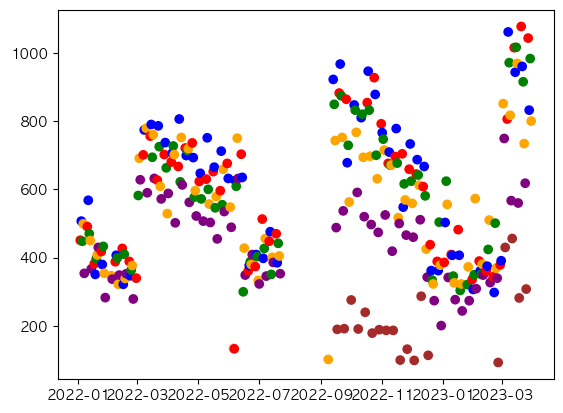

In [132]:
## 일단 중식 석식을 모두 합한 값에 대해서 선형회귀 분석을 진행해볼까 합니다.

import matplotlib.pyplot as plt
date_tot= date_tot.dropna(axis=0)
print(date_tot['합계'].mean())
colors = {0 : 'red', 1 : 'blue', 2 : 'green', 3 : 'orange', 4 : 'purple', 5 : 'brown', 6: 'pink'}
plt.scatter(date_tot['날짜'],date_tot['합계'],c=date_tot['요일'].map(colors))
plt.show()


이렇게 보면 큰 유의미한 결과가 잘 보이지 않습니다.

#### 2.2.2 꺾은 선 그래프에 의한 시각화

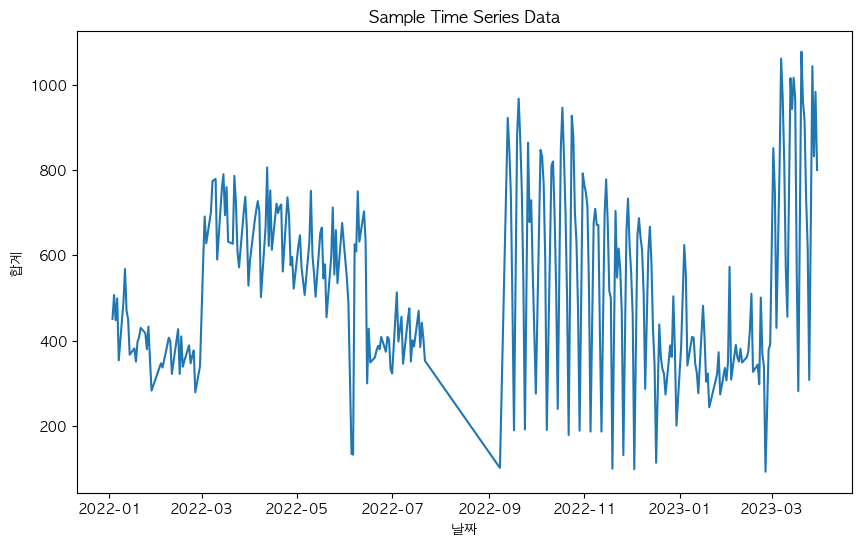

In [114]:


# # 시계열 데이터 생성
# date_rng = pd.date_range(start='1/1/2020', end='12/31/2020', freq='D')
# df = pd.DataFrame(date_rng, columns=['date'])
# df['data'] = np.random.randint(0,100,size=(len(date_rng)))
# df = df.set_index('date')
# print(df.head())

# 시계열 데이터 시각화
plt.figure(figsize=(10,6))
plt.plot(date_tot['날짜'],date_tot['합계'])
plt.xlabel('날짜')
plt.ylabel('합계')
plt.title('Sample Time Series Data')
plt.show()



이 또한 유의미한 결과가 잘 보이지 않습니다.

해서 이 또한 요일별로 색상을 다르게 하여 선 그래프를 그려보았습니다

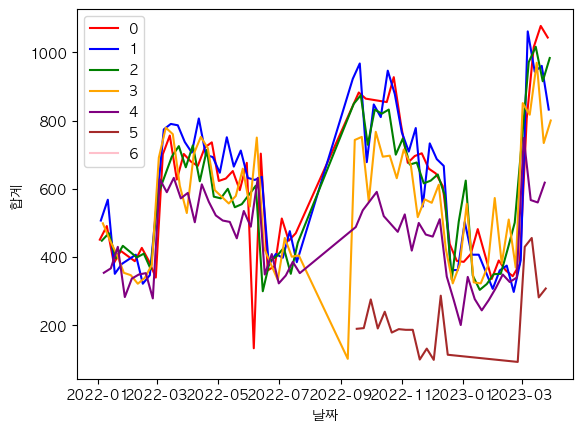

In [115]:
fig, ax = plt.subplots()

for day, color in colors.items():
    subset = date_tot[date_tot['요일'] == day]
    ax.plot(subset['날짜'], subset['합계'], color=color, label=day)

ax.set_xlabel('날짜')
ax.set_ylabel('합계')
ax.legend()
plt.show()

대체적으로 유사한 양상을 띄는 것을 알 수 있었습니다.

조금 더 자세하게 알아보기 위해 각각의 그래프를 따로 만들어 보았습니다.

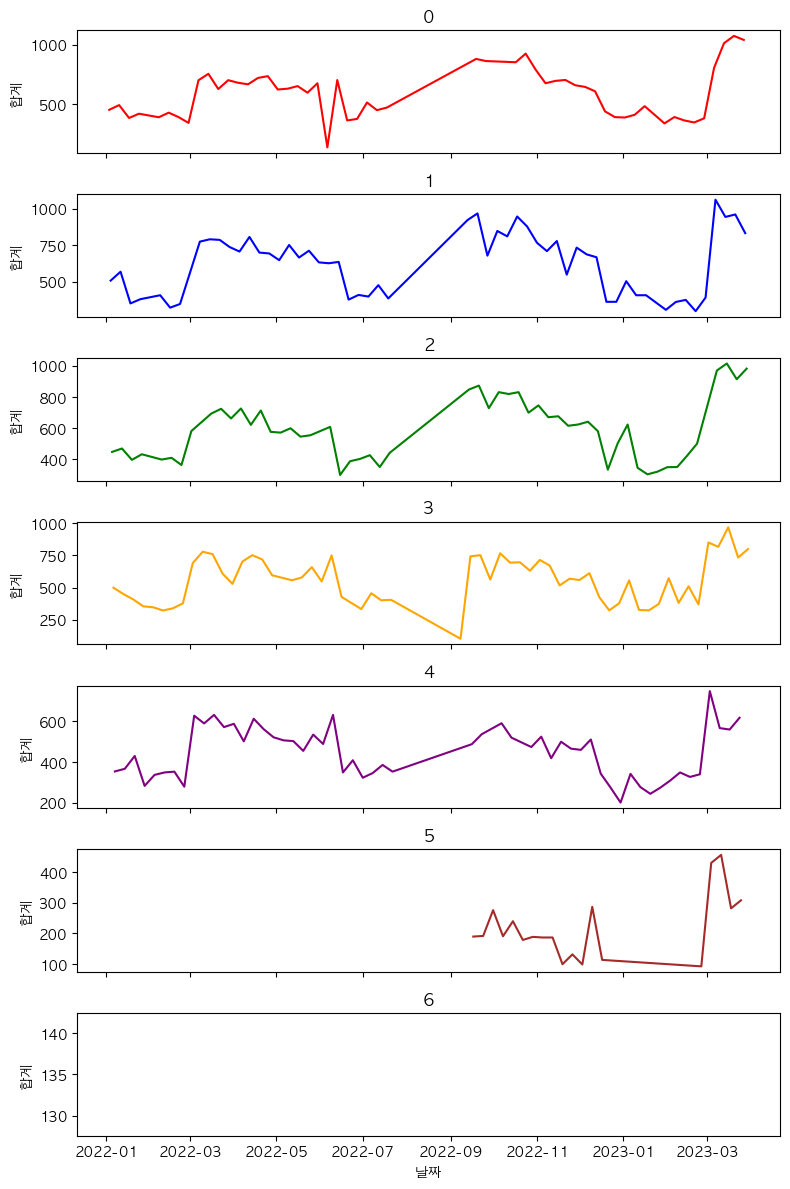

In [116]:
fig, axes = plt.subplots(7, 1, figsize=(8, 12), sharex=True)

# 각 요일별 그래프 그리기
for i, (day, color) in enumerate(colors.items()):
    subset = date_tot[date_tot['요일'] == day]
    axes[i].plot(subset['날짜'], subset['합계'], color=color)
    axes[i].set_ylabel('합계')
    axes[i].set_title(day)

# 공유 x축 설정
axes[-1].set_xlabel('날짜')

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 출력
plt.show()

개강하는 시기는 3월 9월에 사람이 많이 증가하는 것을 알 수 있었으며, 종강하면 사람이 많이 줄어든 다는 것을 알 수 있습니다. 또한 시험기간이 되면 학교에서의 식사인원이 늘어난 다는 것을 알 수 있었습니다. 

그래프들이 8월에 결측치가 있어 이를 해석시 방해가 될것으로 우려되어 그래프를 따로 만들었습니다.

2022 1월 부터 2022년 9월의 값에 대한 그래프

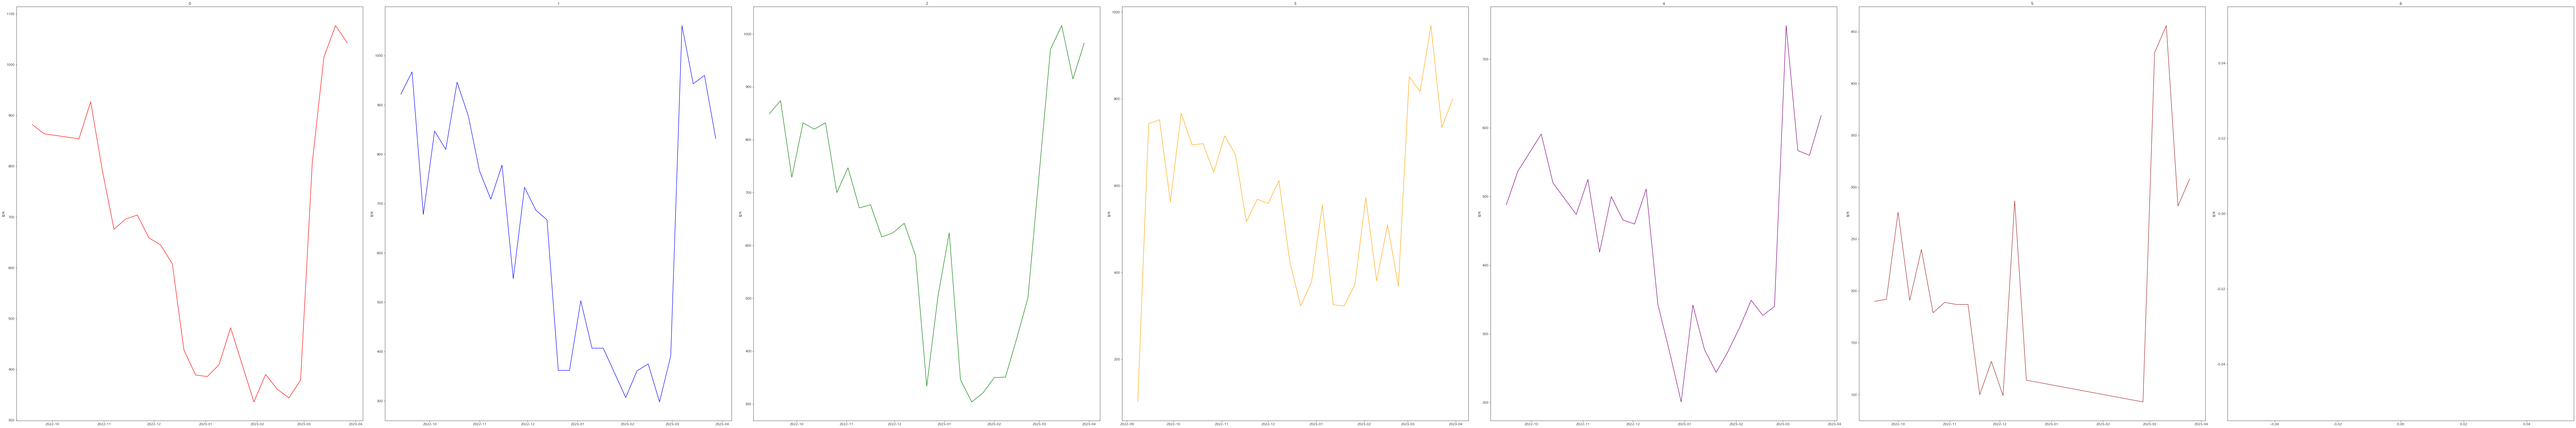

In [117]:
fig, axes = plt.subplots(1, 7, figsize=(120, 20))

for i, (day, color) in enumerate(colors.items()):
    subset = date_tot[(date_tot['요일'] == day) & (date_tot['날짜'].between('2022-09-01', '2023-03-31'))]
    
    axes[i].set_title(day)
    axes[i].plot(pd.to_datetime(subset['날짜']).dt.date, subset['합계'], color=color)
    axes[i].set_ylabel('합계')

plt.tight_layout()
plt.show()

밑에는 2022년 9월 부터 2023년 3월까지의 값을 추가하였습니다

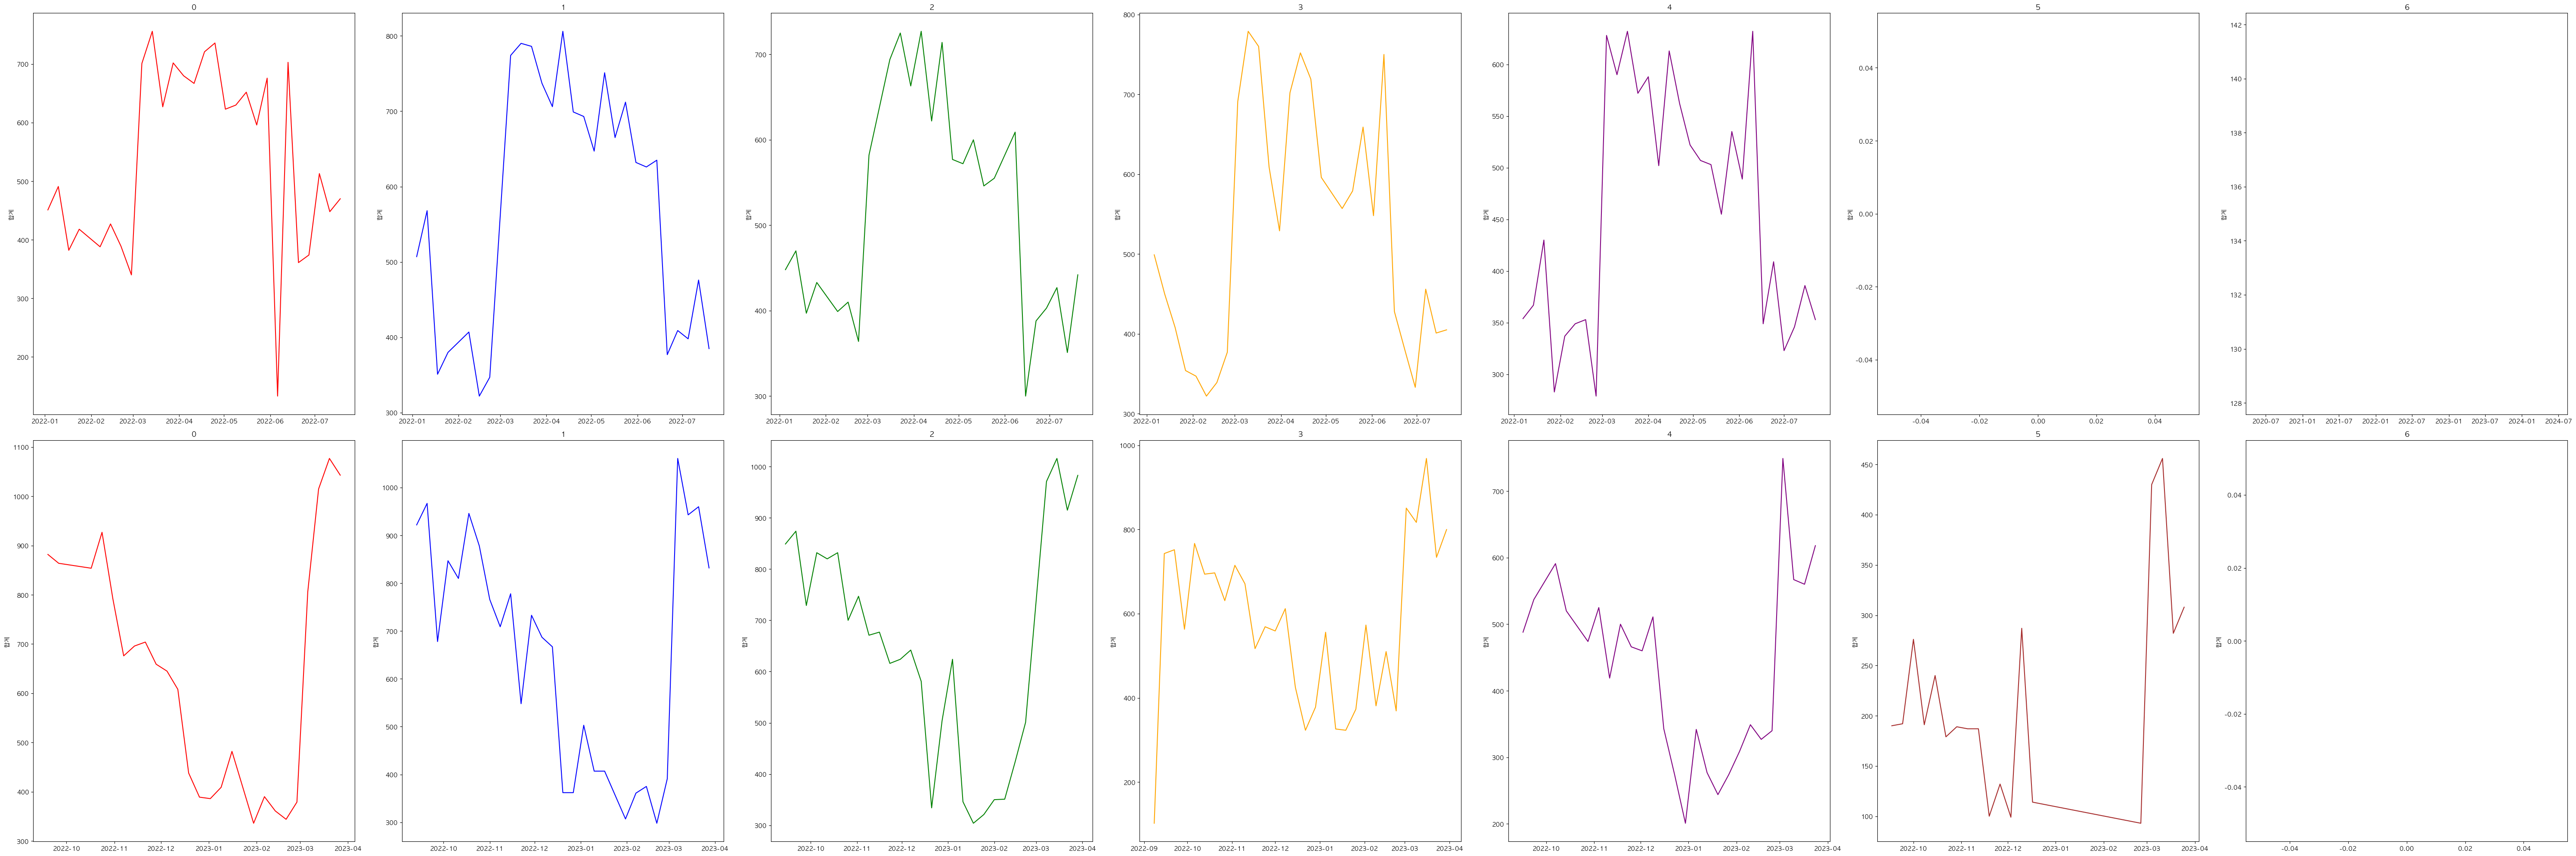

In [118]:
fig, axes = plt.subplots(2, 7, figsize=(60, 20))

for i, (day, color) in enumerate(colors.items()):
    subset1 = date_tot[(date_tot['요일'] == day) & (date_tot['날짜'].between('2022-01-01', '2022-07-31'))]
    subset2 = date_tot[(date_tot['요일'] == day) & (date_tot['날짜'].between('2022-09-01', '2023-03-31'))]
    
    axes[0, i].set_title(day)
    axes[0, i].plot(pd.to_datetime(subset1['날짜']).dt.date, subset1['합계'], color=color)
    axes[0, i].set_ylabel('합계')
    
    axes[1, i].set_title(day)
    axes[1, i].plot(pd.to_datetime(subset2['날짜']).dt.date, subset2['합계'], color=color)
    axes[1, i].set_ylabel('합계')

plt.tight_layout()
plt.show()

여기서 토,일은 결측된 경우가 많아 전부 제거하기로 결정했습니다

IndexError: index 2 is out of bounds for axis 0 with size 2

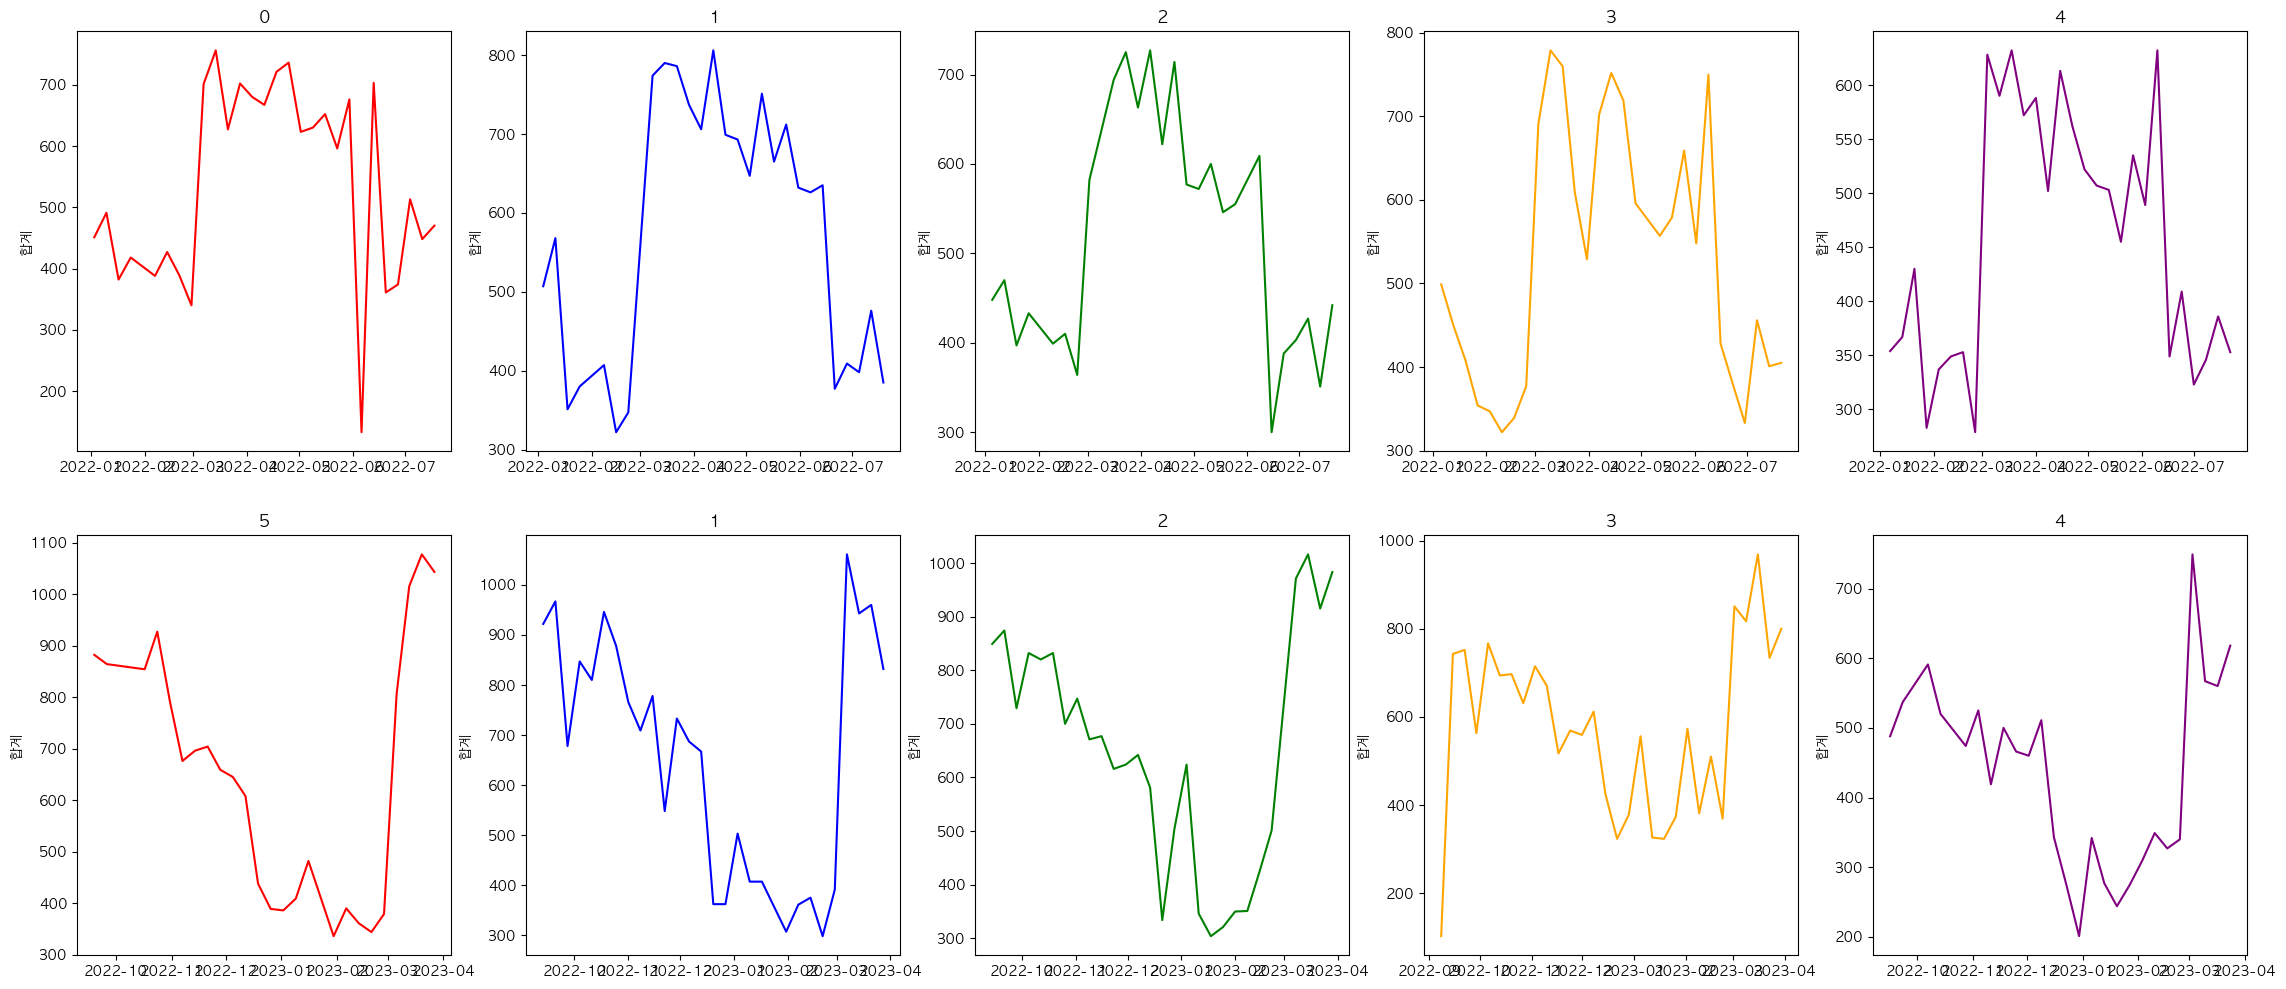

In [119]:
fig, axes = plt.subplots(2, 5, figsize=(28, 12))

# 요일 순서를 원하는 순서로 변경
#ordered_days = ['월', '화', '수', '목', '금']

for i, (day, color) in enumerate(colors.items()):
    # 토요일과 일요일은 그래프에서 제외
    if day in ['토', '일']:
        continue
    
    subset1 = date_tot[(date_tot['요일'] == day) & (date_tot['날짜'].between('2022-01-01', '2022-07-31'))]
    subset2 = date_tot[(date_tot['요일'] == day) & (date_tot['날짜'].between('2022-09-01', '2023-03-31'))]
    
    # 요일 순서대로 그래프 그리기
    ax_row = i // 5  # 5개의 요일을 2개의 행으로 배치하기 위해 행 인덱스 결정
    ax_col = i % 5   # 열 인덱스 결정
    
    axes[ax_row, ax_col].set_title(day)
    axes[ax_row, ax_col].plot(pd.to_datetime(subset1['날짜']).dt.date, subset1['합계'], color=color)
    axes[ax_row, ax_col].set_ylabel('합계')
    
    axes[ax_row+1, ax_col].set_title(day)
    axes[ax_row+1, ax_col].plot(pd.to_datetime(subset2['날짜']).dt.date, subset2['합계'], color=color)
    axes[ax_row+1, ax_col].set_ylabel('합계')

plt.tight_layout()
plt.show()
plt.savefig('savefig_200dpi.png', dpi=200)


In [ ]:
date_tot['합계'] = date_tot['합계'].astype(int)

/var/folders/2q/n2gqggy5615d1nnmy1b2gtpm0000gn/T/ipykernel_2497/3922699400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_tot['합계'] = date_tot['합계'].astype(int)


이건 이렇게 하고 싶었는데 시각화 결과가 이상해 보류 중 입니다.

IndexError: index 5 is out of bounds for axis 0 with size 5

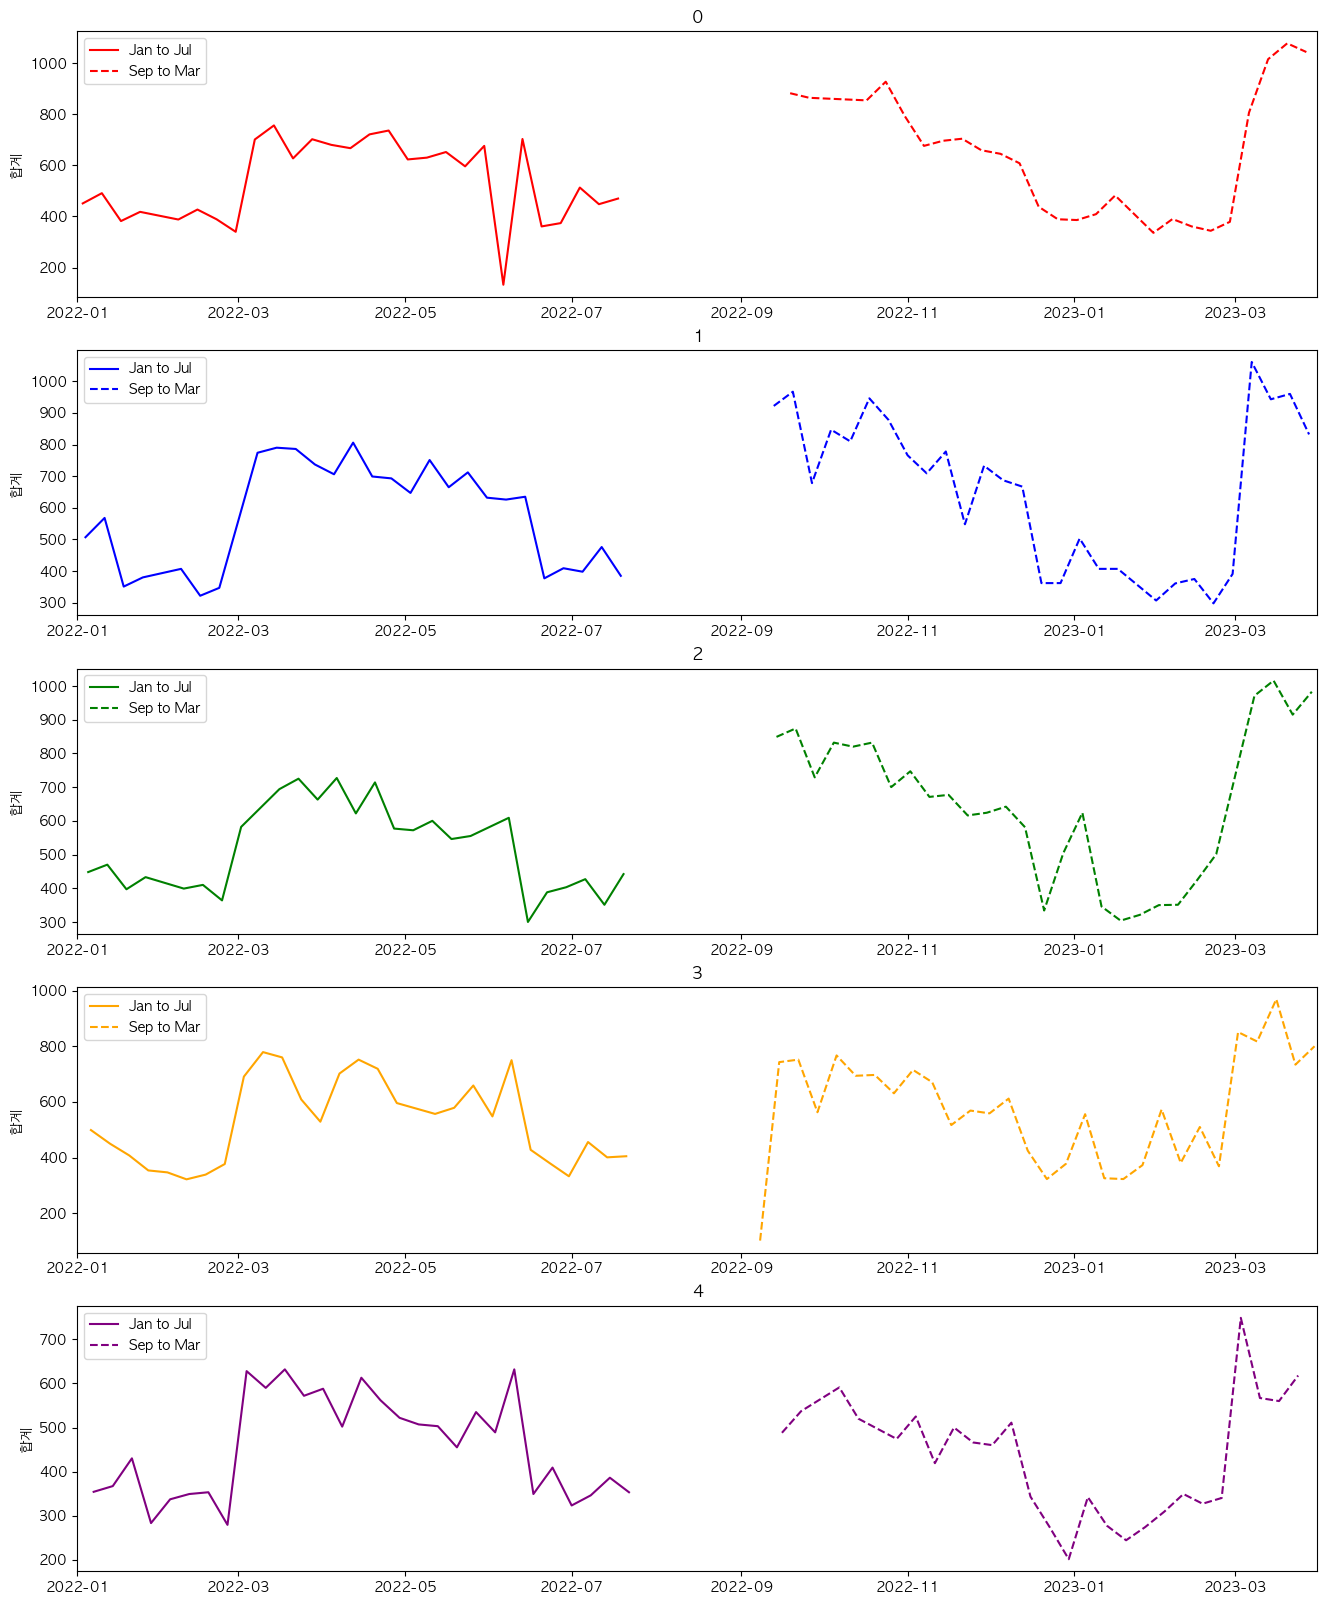

In [ ]:
fig, axes = plt.subplots(5, 1, figsize=(16, 20))

days = ['월', '화', '수', '목', '금']

for i, (day, color) in enumerate(colors.items()):
    if day in ['토', '일']:
        continue
    
    subset1 = date_tot[(date_tot['요일'] == day) & (date_tot['날짜'].between('2022-01-01', '2022-07-31'))]
    subset2 = date_tot[(date_tot['요일'] == day) & (date_tot['날짜'].between('2022-09-01', '2023-03-31'))]
    
    ax = axes[i]

    ax.set_title(day)
    ax.plot(pd.to_datetime(subset1['날짜']).dt.date, subset1['합계'], color=color, label='Jan to Jul')
    ax.plot(pd.to_datetime(subset2['날짜']).dt.date, subset2['합계'], color=color, linestyle='dashed', label='Sep to Mar')
    ax.set_ylabel('합계')
    ax.legend()

    ax.set_xlim(pd.Timestamp('2022-01-01'), pd.Timestamp('2023-03-31'))

for j in range(5, 7):
    axes[j].remove()

plt.tight_layout()
plt.show()


요일마다 나누어 보았을 때 대체로 비슷한 양상을 띄다는 것을 알 수 있었으며, 시험기간에는 그 수가 증가했다는 것도 알 수 있었습니다.

이 밑 시각화는 보류

KeyError: '월'

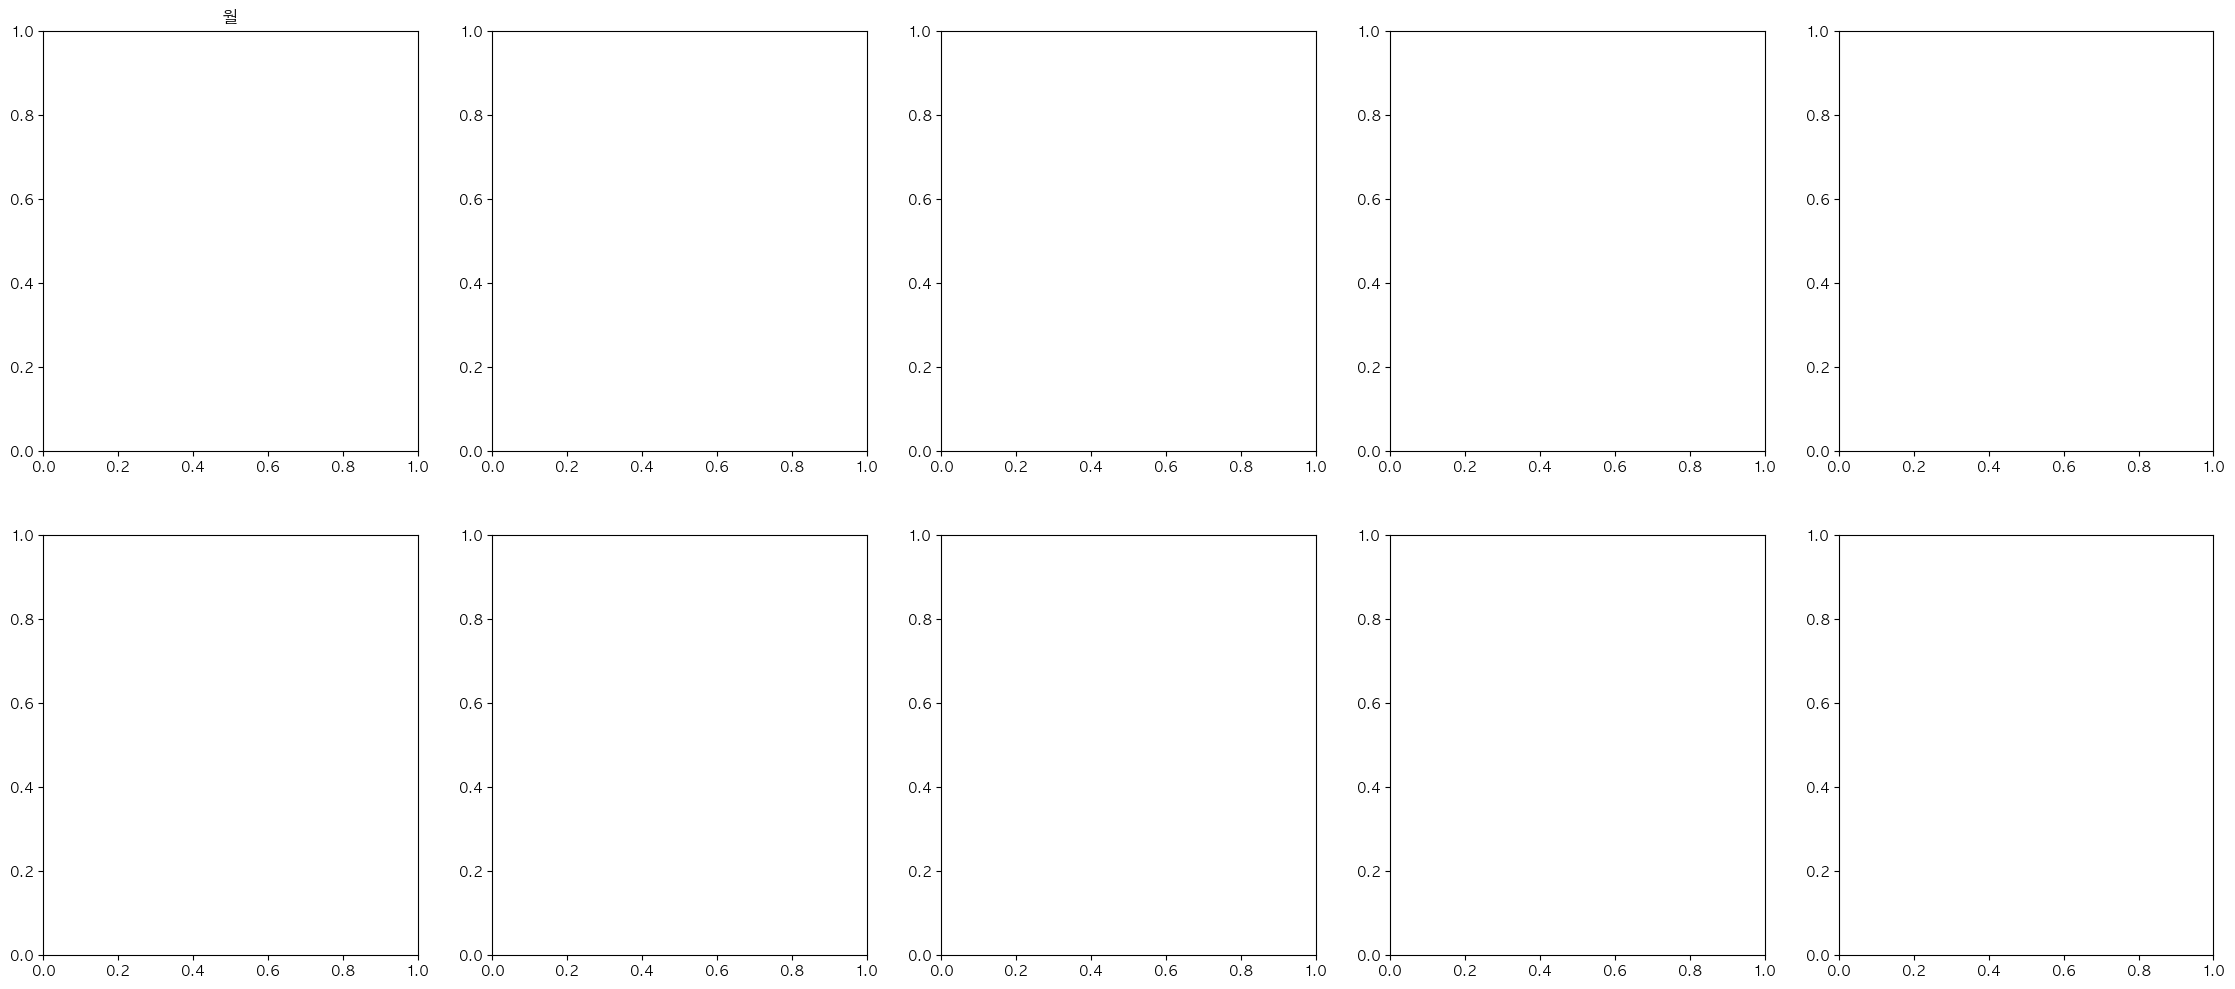

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(28, 12))

# 요일 순서를 원하는 순서로 변경
ordered_days = ['월', '화', '수', '목', '금']

for i, day in enumerate(ordered_days):
    # 토요일과 일요일은 그래프에서 제외
    if day in ['토', '일']:
        continue
    
    subset1 = date_tot[(date_tot['요일'] == day) & (date_tot['날짜'].between('2022-01-01', '2022-07-31'))]
    subset2 = date_tot[(date_tot['요일'] == day) & (date_tot['날짜'].between('2022-09-01', '2023-03-31'))]
    
    # 요일 순서대로 그래프 그리기
    ax_row = i // 5  # 5개의 요일을 2개의 행으로 배치하기 위해 행 인덱스 결정
    ax_col = i % 5   # 열 인덱스 결정
    
    axes[ax_row, ax_col].set_title(day)
    axes[ax_row, ax_col].plot(pd.to_datetime(subset1['날짜']).dt.date, subset1['합계'], color=colors[day])
    axes[ax_row, ax_col].set_ylabel('합계')
    
    if ax_row == 1 and ax_col == 0:
        axes[ax_row, ax_col].set_title('0')  # 맨 왼쪽 아래 그래프의 제목을 0으로 변경
    else:
        axes[ax_row, ax_col].set_title(day)
    
    axes[ax_row, ax_col].plot(pd.to_datetime(subset2['날짜']).dt.date, subset2['합계'], color=colors[day])
    axes[ax_row, ax_col].set_ylabel('합계')

plt.tight_layout()
plt.show()


#### 2.2.3 날씨에 의한 차이

#### 2.2.4 유동인구에 따른 차이

유동인구 만든거 불러오기

In [193]:

def draw_correlation_heatmap(dataframe):
    # 상관관계 계산
    corr_matrix = dataframe.corr()

    # 히트맵 그리기
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('상관관계 히트맵')
    plt.show()


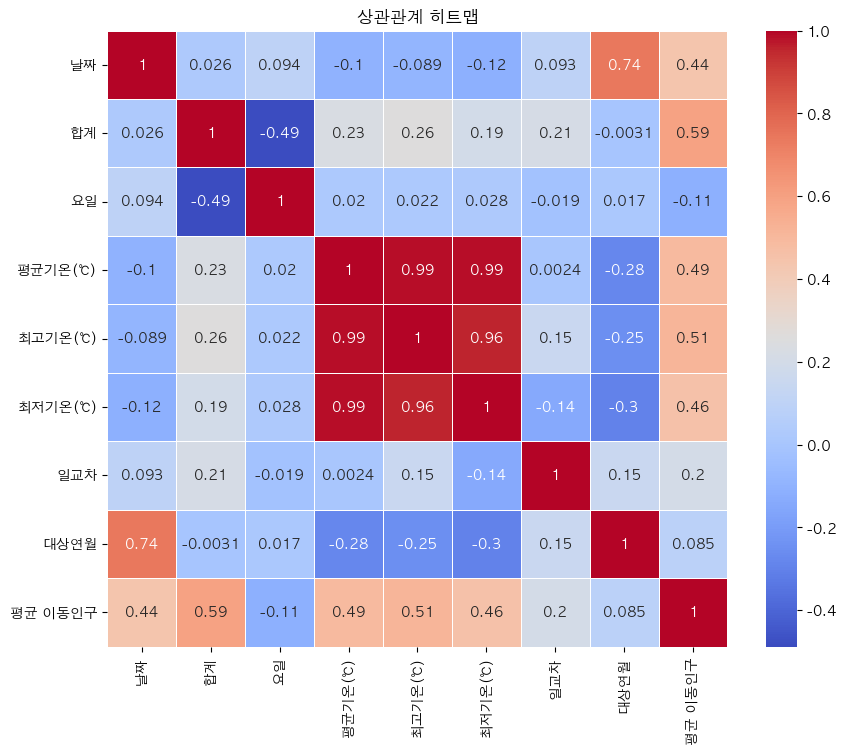

In [194]:
draw_correlation_heatmap(date_weather_flow_tot)


해당 상관관계 분석을 통해서 식수인원과 평균 이동인구가 서로 영향이 있다는 것을 알 수 있었습니다.

### 2.3 선형회귀

In [ ]:
from sklearn.linear_model import LinearRegression

def linear_regression(X, y):
    # 선형회귀 모델 객체 생성
    lr_model = LinearRegression()
    # 모델 학습
    lr_model.fit(X, y)
    # 새로운 데이터에 대한 예측값 계산
    y_pred = lr_model.predict(X)
    # 학습된 모델과 예측값 반환
    return lr_model, y_pred